In [1]:
# dependencies
import chardet
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import plotly.express as px


# API
import requests
import json

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func


In [2]:
# Load in file
# Store filepath in a variable
YOUTUBE_PATH = "Resources/global_youtube.csv"

In [3]:
with open(YOUTUBE_PATH, 'rb') as csv_file:
    raw_content = csv_file.read()
    chardet_result = chardet.detect(raw_content)
print(chardet_result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7289153199558486, 'language': ''}


In [4]:
# Read and display the CSV with Pandas
df = pd.read_csv(YOUTUBE_PATH, encoding=chardet_result['encoding'])
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [6]:
df.columns


Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df.describe()


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [8]:
#remove special characters
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

#Youtuber feature
df['Youtuber'] = df['Youtuber'].apply(lambda x: re.sub(pattern, '', x)) 
df['Youtuber'] = df['Youtuber'].str.strip() 
df['Youtuber'] = df['Youtuber'].str.lstrip('- ') 

In [9]:
#Remove data null in column 'Created Year'
df = df.dropna(subset= ['created_year'])
df['created_year'] = df['created_year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     990 non-null    int64  
 1   Youtuber                                 990 non-null    object 
 2   subscribers                              990 non-null    int64  
 3   video views                              990 non-null    float64
 4   category                                 944 non-null    object 
 5   Title                                    990 non-null    object 
 6   uploads                                  990 non-null    int64  
 7   Country                                  870 non-null    object 
 8   Abbreviation                             870 non-null    object 
 9   channel_type                             963 non-null    object 
 10  video_views_rank                         990 non-null  

In [10]:
df['created_year'].unique()


array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       1970.0, 2019.0, 2022.0], dtype=object)

In [11]:
#Check Created Year is 1970
df[df['created_year'] == 1970]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,1970.0,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


In [12]:
df[df['Youtuber'] == 'YouTube'] = df[df['Youtuber'] == 'YouTube'].replace(1970, 2005)
df[df['Youtuber'] == 'YouTube']

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,2005,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


In [13]:
#After remomved characters, we will some blanks data in column 'Youtuber'. Let's check it
blanks_data_youtuber = df[df['Youtuber'] == '']
blanks_data_youtuber

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
64,65,,43200000,3.645873e+10,Film & Animation,ýýýýýýýý ýý ýýýýýýýýýýýýýý,1478,Russia,RU,Education,...,300000.0,2011.0,May,31.0,81.9,144373535.0,4.59,107683889.0,61.524010,105.318756
161,162,,30400000,1.799996e+10,NaN,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,532,United States,US,Entertainment,...,300000.0,2018.0,Nov,3.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
433,434,,19000000,4.924054e+09,Education,ýýýýýýýýýýýýýý ýýýý,60,United States,US,Entertainment,...,100000.0,2018.0,Feb,20.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
447,448,,18800000,9.594189e+09,Entertainment,ýýýýýýýýýýýýýýýýýýýýýý,530,Ukraine,UA,Entertainment,...,100000.0,2014.0,Oct,20.0,82.7,44385155.0,8.88,30835699.0,48.379433,31.165580
561,562,,16500000,2.440934e+09,Entertainment,ýýýýýýýý ýýýýýýýýýýýýýýýýýýýýýý,421,United States,US,Entertainment,...,200000.0,2014.0,Mar,9.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
606,607,,15900000,1.845330e+09,People & Blogs,Kung Fu Padla,0,Russia,RU,Games,...,10.0,2017.0,May,27.0,81.9,144373535.0,4.59,107683889.0,61.524010,105.318756
632,633,,15500000,8.265130e+09,Shows,ýýýýýýýý ýý ýýýýýýýý,1021,Saudi Arabia,SA,Film,...,300000.0,2017.0,May,16.0,68.0,34268528.0,5.93,28807838.0,23.885942,45.079162
700,701,,14900000,4.390980e+05,People & Blogs,ýýýýýý,1,Russia,RU,News,...,NaN,2008.0,Aug,11.0,81.9,144373535.0,4.59,107683889.0,61.524010,105.318756
707,708,,14800000,7.018015e+09,Howto & Style,ýýýýýýýý ýýýýýýýý,2387,Ukraine,UA,Howto,...,NaN,2015.0,Oct,12.0,82.7,44385155.0,8.88,30835699.0,48.379433,31.165580
714,715,,14700000,2.230986e+09,Entertainment,ýýýýýýýýýý ýýýýýýýýýýýý,1385,Saudi Arabia,SA,Entertainment,...,NaN,2016.0,May,27.0,68.0,34268528.0,5.93,28807838.0,23.885942,45.079162


In [14]:
# Remove rows from with blank Youtuber as these are channels with only special characters
df = df.drop(blanks_data_youtuber.index)
df.reset_index(drop= True, inplace= True)
df[df['Youtuber'] == '']

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [15]:
#Check zero data video views
zero_views = df[df['video views'] == 0]
zero_views

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
5,6,Music,119000000,0.0,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Sports,75000000,0.0,NaN,sports,3,United States,US,Entertainment,...,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
101,103,News,36300000,0.0,NaN,News,0,NaN,NaN,NaN,...,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
171,174,Popular on YouTube,29300000,0.0,NaN,Popular on Youtube,3,NaN,NaN,Education,...,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
357,361,Minecraft - Topic,20900000,0.0,NaN,Minecraft - Topic,0,NaN,NaN,Games,...,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN
584,593,Live,16100000,0.0,NaN,Live,0,NaN,NaN,NaN,...,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Remove zero data video views
df = df.drop(zero_views.index)
df.reset_index(drop= True, inplace= True)
df[df['video views'] == 0]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [17]:
df.duplicated().sum()


0

In [18]:
df.isnull().sum()


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    37
Title                                        0
uploads                                      0
Country                                    113
Abbreviation                               113
channel_type                                24
video_views_rank                             0
country_rank                               107
channel_type_rank                           25
video_views_for_the_last_30_days            45
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               322
created_year                                 0
created_month                                0
created_date 

In [19]:
#Select category columns
categorical_variables = df.select_dtypes(include= 'O').columns

#Replace object datatype column missing values with 'Other'
df[categorical_variables] = df[categorical_variables].fillna('Other')

In [20]:
df.isna().sum()


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                                 0
channel_type                                 0
video_views_rank                             0
country_rank                               107
channel_type_rank                           25
video_views_for_the_last_30_days            45
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               322
created_year                                 0
created_month                                0
created_date 

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     966 non-null    int64  
 1   Youtuber                                 966 non-null    object 
 2   subscribers                              966 non-null    int64  
 3   video views                              966 non-null    float64
 4   category                                 966 non-null    object 
 5   Title                                    966 non-null    object 
 6   uploads                                  966 non-null    int64  
 7   Country                                  966 non-null    object 
 8   Abbreviation                             966 non-null    object 
 9   channel_type                             966 non-null    object 
 10  video_views_rank                         966 non-n

In [22]:
#Youtube is not null
youtube_not_null = df.dropna(subset= ['Gross tertiary education enrollment (%)','Unemployment rate', 'Population', 'Urban_population'])

#Mean Education Enrollment
mean_edu = round(youtube_not_null['Gross tertiary education enrollment (%)'].mean(),1)
print('Mean Gross Tertiary Education Enrollment:', mean_edu)

#Mean Unemployment Rate
mean_unemp = round(youtube_not_null['Unemployment rate'].mean(),1)
print('Mean Unemployment Rate:', mean_unemp)

#Mean Population
mean_popu = round(youtube_not_null['Population'].mean(),0)
print('Mean Population:', mean_popu)

#Mean Urban Population
mean_urban = round(youtube_not_null['Urban_population'].mean(),0)
print('Mean Urban Population:', mean_urban)

Mean Gross Tertiary Education Enrollment: 63.2
Mean Unemployment Rate: 9.3
Mean Population: 436369043.0
Mean Urban Population: 226156206.0


In [23]:
#Replace object datatype column missing values with Mean Values
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].fillna(mean_edu)
df['Unemployment rate'] = df['Unemployment rate'].fillna(mean_unemp)
df['Population'] = df['Population'].fillna(mean_popu)
df['Urban_population'] = df['Urban_population'].fillna(mean_urban)


In [24]:
# Convert several float data typescolumns to integars
df = df.astype({
    'video views': 'int64',
    'created_year': 'int64',
    'Population': 'int64',
    'Urban_population': 'int64'
})

# Validate results of datatype change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     966 non-null    int64  
 1   Youtuber                                 966 non-null    object 
 2   subscribers                              966 non-null    int64  
 3   video views                              966 non-null    int64  
 4   category                                 966 non-null    object 
 5   Title                                    966 non-null    object 
 6   uploads                                  966 non-null    int64  
 7   Country                                  966 non-null    object 
 8   Abbreviation                             966 non-null    object 
 9   channel_type                             966 non-null    object 
 10  video_views_rank                         966 non-n

In [25]:
#sorting the dataframe and resetting index (by 'Subscribers)
df = df.sort_values(by = 'subscribers', ascending= False).reset_index(drop= True)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
4,7,Kids Diana Show,112000000,93247040539,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,991,Natan por A,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
962,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
963,993,Panda,12300000,2214684303,Other,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
964,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     966 non-null    int64  
 1   Youtuber                                 966 non-null    object 
 2   subscribers                              966 non-null    int64  
 3   video views                              966 non-null    int64  
 4   category                                 966 non-null    object 
 5   Title                                    966 non-null    object 
 6   uploads                                  966 non-null    int64  
 7   Country                                  966 non-null    object 
 8   Abbreviation                             966 non-null    object 
 9   channel_type                             966 non-null    object 
 10  video_views_rank                         966 non-n

In [27]:
# Rename specific columns
df = df.rename(columns={
    'Gross tertiary education enrollment (%)': 'gross education enrollment percentage',
    'Youtuber': 'youtuber',
    'Title': 'title',
    'Abbreviation': 'abbreviation',
    'Country' : 'country',
    'Population': 'population',
    'Unemployment rate': 'unemployment_rate',
    'Urban_population' : 'urban_population',
    'Latitude' : 'latitude',
    'Longitude' : 'longitude',
    'video views' : 'video_views'
    })

# Display the DataFrame with renamed columns
df.head()

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross education enrollment percentage,population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
4,7,Kids Diana Show,112000000,93247040539,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rank                                   966 non-null    int64  
 1   youtuber                               966 non-null    object 
 2   subscribers                            966 non-null    int64  
 3   video_views                            966 non-null    int64  
 4   category                               966 non-null    object 
 5   title                                  966 non-null    object 
 6   uploads                                966 non-null    int64  
 7   country                                966 non-null    object 
 8   abbreviation                           966 non-null    object 
 9   channel_type                           966 non-null    object 
 10  video_views_rank                       966 non-null    float64
 11  countr

In [29]:
df.to_csv('./Resources/database.csv', index=False)

In [30]:
file_path = './Resources/database.csv'  # Replace with the path to your CSV filed
df= pd.read_csv(file_path)

In [31]:
#create engine to sqlite file
engine = create_engine("sqlite:///Resources/Youtubedata.sqlite", echo=False)

In [32]:
df.to_sql("my_table", con=engine, if_exists='replace', index=False)

966

In [33]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [34]:
# Create a session
session = Session(engine)

In [35]:
#utilize inspector to confirm existance 
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

my_table
-----------
rank BIGINT
youtuber TEXT
subscribers BIGINT
video_views BIGINT
category TEXT
title TEXT
uploads BIGINT
country TEXT
abbreviation TEXT
channel_type TEXT
video_views_rank FLOAT
country_rank FLOAT
channel_type_rank FLOAT
video_views_for_the_last_30_days FLOAT
lowest_monthly_earnings FLOAT
highest_monthly_earnings FLOAT
lowest_yearly_earnings FLOAT
highest_yearly_earnings FLOAT
subscribers_for_last_30_days FLOAT
created_year BIGINT
created_month TEXT
created_date FLOAT
gross education enrollment percentage FLOAT
population BIGINT
unemployment_rate FLOAT
urban_population BIGINT
latitude FLOAT
longitude FLOAT



In [36]:
#1. Define the SQL query top channels by subscribers
query = """
SELECT Rank, Youtuber, subscribers / 1000000 AS "subscribers (million)", country, channel_type
FROM my_table
ORDER BY subscribers DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers (million),country,channel_type
0,1,T-Series,245,India,Music
1,3,MrBeast,166,United States,Entertainment
2,4,Cocomelon - Nursery Rhymes,162,United States,Education
3,5,SET India,159,India,Entertainment
4,7,Kids Diana Show,112,United States,Entertainment
5,8,PewDiePie,111,Japan,Entertainment
6,9,Like Nastya,106,Russia,People
7,10,Vlad and Niki,98,United States,Entertainment
8,11,Zee Music Company,96,India,Music
9,12,WWE,96,United States,Sports


In [37]:
#2. What are the top 25 YouTube channels by country?
query = """
SELECT Rank, Youtuber, subscribers /1000000 AS "subscribers (million)", country, channel_type, category
FROM my_table
GROUP BY country 
ORDER BY channel_type DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers (million),country,channel_type,category
0,424,FIFA,19,Switzerland,Sports,Sports
1,77,shfa2 -,39,United Arab Emirates,People,People & Blogs
2,9,Like Nastya,106,Russia,People,People & Blogs
3,72,Kimberly Loaiza,41,Mexico,People,People & Blogs
4,51,A4,46,Cuba,People,Gaming
5,664,Musas,15,Andorra,People,Howto & Style
6,191,Sandeep Maheshwari,27,Singapore,Other,People & Blogs
7,372,Avicii,20,Sweden,Music,Music
8,14,BLACKPINK,89,South Korea,Music,People & Blogs
9,900,DJ Khaled,13,Samoa,Music,Music


In [38]:
#3. What are the top 25 YouTube channels by the number of views?
query = """
SELECT Rank, Youtuber, subscribers/1000000 AS "subscribers (million)", video_views/1000000 AS "video_views (million)", country, channel_type
FROM my_table
GROUP BY channel_type
ORDER BY video_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers (million),video_views (million),country,channel_type
0,1,T-Series,245,228000,India,Music
1,4,Cocomelon - Nursery Rhymes,162,164000,United States,Education
2,9,Like Nastya,106,90479,Russia,People
3,12,WWE,96,77428,United States,Sports
4,30,Movieclips,59,59316,United States,Film
5,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54,32312,Other,Other
6,3,MrBeast,166,28368,United States,Entertainment
7,64,Shakira,43,27568,Colombia,Howto
8,34,Aaj Tak,57,25307,India,News
9,276,That Little Puff,23,20289,United States,Animals


In [39]:
#4. What categories will get the most views ?
query = """
SELECT rank, youtuber, subscribers /1000000 AS "subscribers (million)", channel_type, category, country, SUM(video_views) AS total_views
FROM my_table
GROUP BY category
ORDER BY video_views DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,subscribers (million),channel_type,category,country,total_views
0,1,T-Series,245,Music,Music,India,3103516219048
1,4,Cocomelon - Nursery Rhymes,162,Education,Education,United States,691690418531
2,5,SET India,159,Entertainment,Shows,India,432356612140
3,7,Kids Diana Show,112,Entertainment,People & Blogs,United States,1251773521276
4,12,WWE,96,Sports,Sports,United States,147986290620
5,8,PewDiePie,111,Entertainment,Gaming,Japan,706166809255
6,3,MrBeast,166,Entertainment,Entertainment,United States,2500154780534
7,17,5-Minute Crafts,80,Entertainment,Howto & Style,United Kingdom,194799530478
8,34,Aaj Tak,57,News,News & Politics,India,270391919347
9,15,Goldmines,86,Music,Film & Animation,Other,507963782337


In [40]:
# 5. Which channels have the highest total video views?
query = """
SELECT category, channel_type, SUM(video_views)/1000000 AS "total_views" 
FROM my_table
GROUP BY channel_type
ORDER BY total_views DESC
LIMIT 25 """

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,category,channel_type,total_views
0,Entertainment,Entertainment,3322035
1,Music,Music,3250295
2,People & Blogs,People,877467
3,Education,Education,728347
4,Gaming,Games,711352
5,Comedy,Comedy,453140
6,Film & Animation,Film,450977
7,News & Politics,News,311352
8,Music,Other,215963
9,People & Blogs,Howto,188632


In [41]:
# 6. What are the top 25 Youtube channels by upload
query = """
SELECT rank, youtuber, channel_type, uploads 
FROM my_table
ORDER BY uploads DESC
LIMIT 25
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,youtuber,channel_type,uploads
0,96,ABP NEWS,News,301308
1,858,GMA Integrated News,News,296272
2,748,TV9 Bharatvarsh,News,293516
3,34,Aaj Tak,News,283775
4,108,IndiaTV,News,273255
5,690,KOMPASTV,News,269050
6,587,Thairath Online,News,244899
7,503,News 24,News,211620
8,674,ABS-CBN News,News,209520
9,85,TEDx Talks,Nonprofit,200933


In [42]:
# 7. Channels with the highest yearly earnings
query = """
SELECT rank, youtuber, subscribers /1000000 AS "subscribers (million)", category, country,  MAX(highest_yearly_earnings) AS highest_yearly_earnings
FROM my_table
GROUP BY youtuber
ORDER BY highest_yearly_earnings DESC
LIMIT 50;
"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(50)

,rank,youtuber,subscribers (million),category,country,highest_yearly_earnings
0,496,KIMPRO,17,Other,South Korea,163400000.0
1,418,DaFuq!?Boom!,19,Film & Animation,United States,110600000.0
2,1,T-Series,245,Music,India,108400000.0
3,303,KL BRO Biju Rithvik,22,Entertainment,Other,97600000.0
4,4,Cocomelon - Nursery Rhymes,162,Education,United States,94800000.0
5,5,SET India,159,Shows,India,87500000.0
6,22,Zee TV,70,Entertainment,India,81900000.0
7,140,StarPlus,32,Entertainment,India,80000000.0
8,16,Sony SAB,83,Shows,India,79600000.0
9,84,GR6 EXPLODE,38,Music,Brazil,78500000.0


In [43]:
# 8. Calculate the average earnings per YouTuber:
query = """ 
SELECT 
    Youtuber,
    country,
    AVG((lowest_monthly_earnings + highest_monthly_earnings) / 2) AS avg_monthly_earnings,
    AVG((lowest_yearly_earnings + highest_yearly_earnings) / 2) AS avg_yearly_earnings
FROM my_table
WHERE rank <= 25
GROUP BY Youtuber, country
ORDER BY avg_yearly_earnings DESC;
"""
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,youtuber,country,avg_monthly_earnings,avg_yearly_earnings
0,T-Series,India,4782300.000,5.760000e+07
1,Cocomelon - Nursery Rhymes,United States,4196900.000,5.035000e+07
2,SET India,India,3877950.000,4.650000e+07
3,Zee TV,India,3613400.000,4.350000e+07
4,Sony SAB,India,3507150.000,4.230000e+07
5,MrBeast,United States,2868500.000,3.435000e+07
6,Zee Music Company,India,1700450.000,2.050000e+07
7,Kids Diana Show,United States,1541450.000,1.865000e+07
8,WWE,United States,1539350.000,1.820000e+07
9,HYBE LABELS,South Korea,1274750.000,1.525000e+07


In [44]:
# 9. Calculate the average earnings per country:
query = """ 
SELECT 
    country,
    AVG((lowest_monthly_earnings + highest_monthly_earnings) / 2) AS avg_monthly_earnings,
    AVG((lowest_yearly_earnings + highest_yearly_earnings) / 2) AS avg_yearly_earnings
FROM my_table
WHERE rank <= 25
GROUP BY country
ORDER BY avg_yearly_earnings DESC;
"""
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,country,avg_monthly_earnings,avg_yearly_earnings
0,India,3.063967e+06,3.685833e+07
1,United States,2.062983e+06,2.473333e+07
2,South Korea,8.982500e+05,1.075082e+07
3,Canada,3.747000e+05,4.514500e+06
4,Russia,1.040000e+05,1.223400e+06
5,Japan,8.325000e+04,1.008800e+06
6,Other,3.500000e-02,4.550000e-01
7,United Kingdom,0.000000e+00,2.500000e-02
8,Brazil,0.000000e+00,0.000000e+00


In [45]:
# 10. Category with the most channels in the top 100 by subscribers:
query = """ 
SELECT rank, category, subscribers, COUNT(*) AS Channel_Count
FROM my_table
WHERE rank <= 100
GROUP BY category
ORDER BY Channel_Count DESC
LIMIT 10
"""
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,category,subscribers,Channel_Count
0,1,Music,245000000,30
1,3,Entertainment,166000000,20
2,7,People & Blogs,112000000,11
3,4,Education,162000000,7
4,8,Gaming,111000000,6
5,5,Shows,159000000,5
6,60,Comedy,44200000,4
7,15,Film & Animation,86900000,3
8,71,Trailers,41400000,2
9,12,Sports,96000000,2


In [46]:
# 11. How do YouTube channels from different countries compare in terms of average subscribers and views?
query = """ 
SELECT rank, country, 
       AVG(subscribers)/1000000 AS avg_subscribers,
       AVG(video_views)/1000000 AS avg_video_views
FROM my_table
GROUP BY Country
ORDER BY avg_subscribers DESC, avg_video_views DESC """
    
# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,rank,country,avg_subscribers,avg_video_views
0,51,Cuba,46.300000,22936.630813
1,53,El Salvador,46.100000,10323.391593
2,70,Barbados,41.900000,22477.745835
3,8,Japan,37.820000,17136.403487
4,152,Venezuela,31.200000,9673.649438
5,159,Kuwait,30.500000,4521.573939
6,14,South Korea,29.206250,14061.970697
7,45,Chile,29.066667,9782.518859
8,9,Russia,27.809091,16408.127511
9,57,Pakistan,25.900000,18882.236237


In [47]:
# 11. Channel type location latitude and longitude

# user inputs
user_country = 'All'



# switch on user_country
if user_country == 'All':
    where_clause = "and 1=1"
else:
    where_clause = f"and country = '{user_country}'"

query = f""" 
SELECT 
    country,
    latitude, 
    longitude, 
    COUNT(channel_type) AS channel_count
FROM 
    my_table
     
GROUP BY 
    Latitude, 
    Longitude
ORDER BY 
    channel_count DESC
    """

# Execute the query and read the results into a DataFrame
map_df = pd.read_sql(text(query), con=engine)
map_df.head(25)

,country,latitude,longitude,channel_count
0,United States,37.090240,-95.712891,306
1,India,20.593684,78.962880,168
2,Other,NaN,NaN,114
3,Brazil,-14.235004,-51.925280,61
4,United Kingdom,55.378051,-3.435973,43
5,Mexico,23.634501,-102.552784,33
6,Indonesia,-0.789275,113.921327,28
7,Spain,40.463667,-3.749220,22
8,Thailand,15.870032,100.992541,18
9,South Korea,35.907757,127.766922,16


In [48]:
# 12. Compare country youtuber's performace base on Population, Unemployment rate, Urban_population 
query = """
SELECT 
    country,
    population, 
    unemployment_rate, 
    urban_population, 
    COUNT(channel_type) AS channel_count
FROM 
    my_table
GROUP BY 
    country
ORDER BY 
    channel_count DESC
    """

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,country,population,unemployment_rate,urban_population,channel_count
0,United States,328239523,14.70,270663028,306
1,India,1366417754,5.36,471031528,168
2,Other,436369043,9.30,226156206,113
3,Brazil,212559417,12.08,183241641,61
4,United Kingdom,66834405,3.85,55908316,43
5,Mexico,126014024,3.42,102626859,33
6,Indonesia,270203917,4.69,151509724,28
7,Spain,47076781,13.96,37927409,22
8,Thailand,69625582,0.75,35294600,18
9,South Korea,51709098,4.15,42106719,16


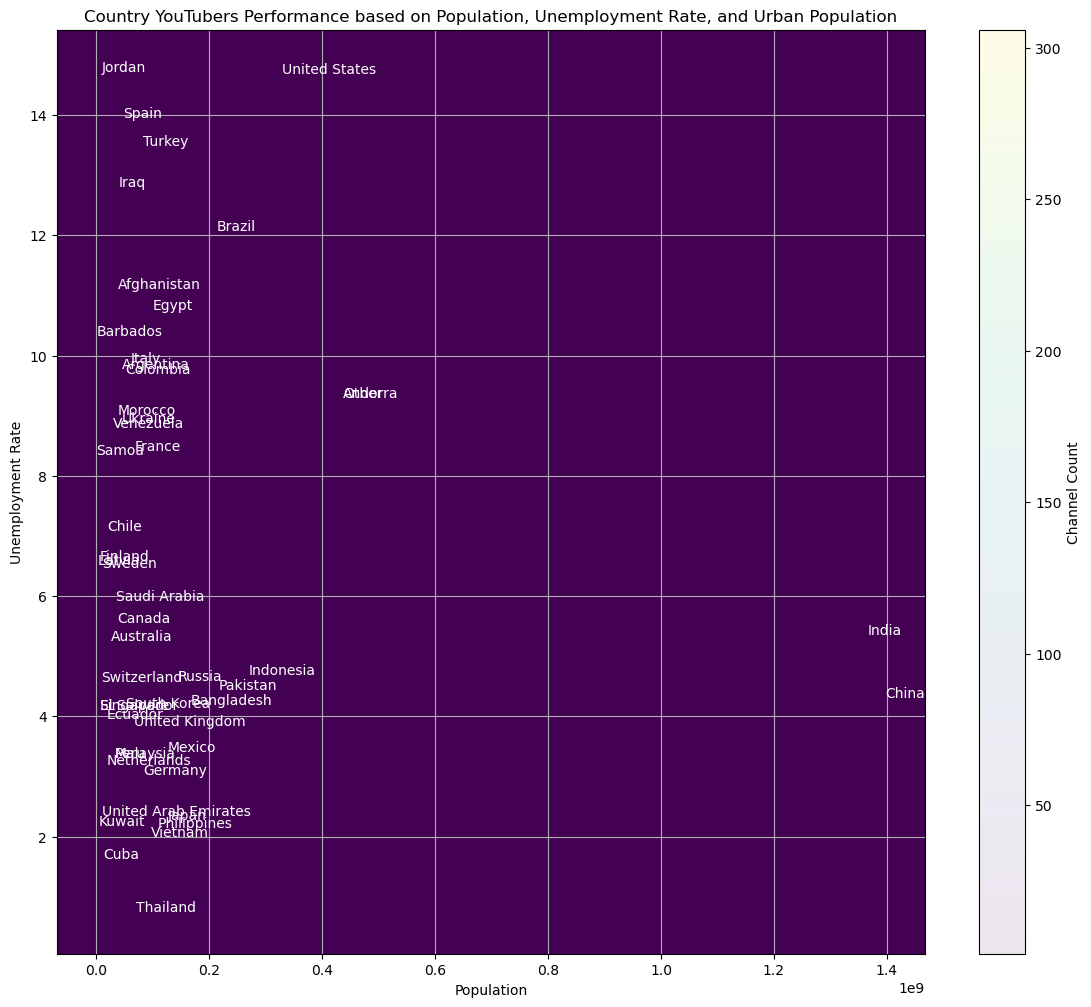

In [49]:
# Data from the SQL query
countries = df['country']
population = df['population']
unemployment_rate = df['unemployment_rate']
urban_population = df['urban_population']
channel_count = df['channel_count']

# Create the scatter plot
plt.figure(figsize=(14, 12))
scatter = plt.scatter(population, unemployment_rate, s=urban_population*10, c=channel_count, cmap='viridis', alpha=0.10)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Unemployment Rate')
plt.title('Country YouTubers Performance based on Population, Unemployment Rate, and Urban Population')


# Add country labels
for i, country in enumerate(countries):
    plt.text(population[i], unemployment_rate[i], country, color='white')

# Add a colorbar legend for the number of channels
plt.colorbar(scatter, label='Channel Count')

plt.grid(True)
plt.show()

In [50]:
query = """
SELECT 
    CASE 
        WHEN Country IN ('Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde','Cameroon','Central African Republic',
            'Chad','Comoros','Congo, Dem. Rep', 'Congo, Rep.','Cote d''Ivoire','Djibouti','Egypt','Equatorial Guinea','Eritrea',
            'Eswatini (formerly Swaziland)','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya', 'Lesotho',
            'Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia',
            'Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa',
            'South Sudan','Sudan','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe') THEN 'Africa'
        
        WHEN Country IN ('Albania','Andorra', 'Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina',
            'Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Georgia','Germany',
            'Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania',
            'Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','Macedonia, FYR','Norway','Poland','Portugal',
            'Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey',
            'Ukraine','United Kingdom','Vatican City') THEN 'Europe'
        
        WHEN Country IN ('Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh', 'Bhutan','Brunei','Cambodia','China','Cyprus',
            'Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Kuwait','Kyrgyzstan','Laos',
            'Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Oman','Pakistan','Palestine','Philippines',
            'Qatar','Russia','Saudi Arabia','Singapore','South Korea','Sri Lanka','Syria','Taiwan','Tajikistan','Thailand',
            'Timor-Leste','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen') THEN 'Asia'
        
        WHEN Country IN ('Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica',
            'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico',
            'Nicaragua','Panama','Saint Vincent and the Grenadines','United States') THEN 'North_America'
        
        WHEN Country IN ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname',
            'Uruguay','Venezuela') THEN 'South_America'
        
        WHEN Country IN ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau',
            'Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu') THEN 'Australia_and_Oceania'
    END AS Region,
    country,
    SUM(subscribers) AS total_subscribers,
    SUM(uploads) AS total_uploads,
    SUM([video_views]) AS total_views
    
FROM my_table
group by country

"""

# Execute the query and read the results into a DataFrame
df = pd.read_sql(text(query), con=engine)
df.head(25)

,Region,country,total_subscribers,total_uploads,total_views
0,Asia,Afghanistan,20400000,0,13397000296
1,Europe,Andorra,15100000,159,2400037562
2,South_America,Argentina,328500000,17240,194415353954
3,Australia_and_Oceania,Australia,154400000,7179,65389465134
4,Asia,Bangladesh,13900000,6,12129583055
5,North_America,Barbados,41900000,84,22477745835
6,South_America,Brazil,1207300000,168178,478768256178
7,North_America,Canada,363900000,46745,191320574087
8,South_America,Chile,87200000,6771,29347556577
9,Asia,China,17600000,128,2977741577


In [51]:
# close the engine
engine.dispose()